# Hypothesis Testing

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from statsmodels.stats.contingency_tables import mcnemar

## 1️⃣ One-Sample Z-Test (Proportion Example)

Test if CTR = 8%.

Z-statistic: 1.0231402322579177 p-value: 0.3062415469720413


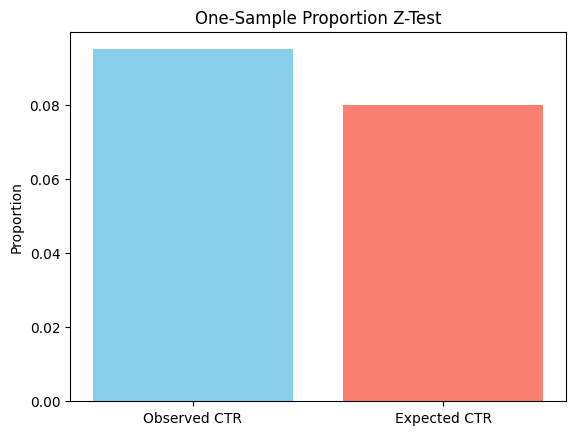

In [14]:
# Data
n = 400
successes = 38
p0 = 0.08

stat, pval = proportions_ztest(count=successes, nobs=n, value=p0)

print("Z-statistic:", stat, "p-value:", pval)

# Visualization
observed = successes / n
plt.bar(["Observed CTR", "Expected CTR"], [observed, p0], color=["skyblue", "salmon"])
plt.title("One-Sample Proportion Z-Test")
plt.ylabel("Proportion")
plt.show()

Null Hypothesis H0: The CTR is 8%
Alternative Hypothesis Ha: The CTR is not equal to 8%
Stat = 2.7213442056664356
pvalue = 0.00650170237308183

There is enough evidence that the sample has data that is rare enough to reject the hypothesis H0 ie The CTR is 8%
Null proportion p0 = 0.08
95% confidence interval (acceptance range) = [0.0534, 0.1066]
There is enough evidence that the sample has data that is rare enough to reject the hypothesis H0 ie The CTR is 8%


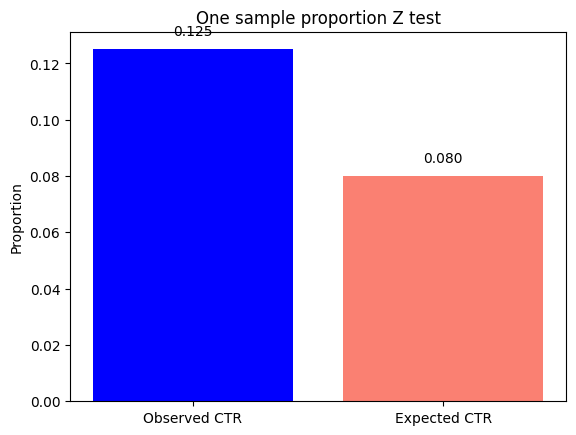

In [4]:
# 1️⃣ One-sample Z-test (proportion)
# A website claims that 8% of visitors click on its banner ad. In a sample of 400 visitors, 50 clicked the ad. Test at α = 0.05 whether the actual click-through rate is different from 8%.
########
####Answer#######
# Here the population mean is given at 8% or 0.08 CTR
# The observed sample has 50 clicks out of 400 visitors
# Alpha is 0.05
# Since it is a proportion and we have enough data we will use 1 sample proportion z test

n = 400
success = 50
p0 = 0.08
alpha = 0.05
H0 = "The CTR is 8%"
Ha = "The CTR is not equal to 8%"

print(f"Null Hypothesis H0: {H0}\nAlternative Hypothesis Ha: {Ha}")
stat, pvalue = proportions_ztest(count=success, nobs=n, value=p0,prop_var=False )
print(f"Stat = {stat}\npvalue = {pvalue}\n")

if pvalue < alpha :
    print(f"There is enough evidence that the sample has data that is rare enough to reject the hypothesis H0 ie {H0}")
else:
    print(f"There isn't enough evidence that the sample has data that is rare enough to reject the hypothesis H0 ie {H0}")

#------------- Another way to do this ---------------------------
# find the confidence interval for the given population proportion ie 8% CTR in this case
# any sample that has a proportion outside this range will reject the H0 else fail to reject H0

# Convert proportion to number of successes
successes_null = int(p0 * n)
confidence = 1 - alpha
# Compute confidence interval using normal approximation
CI_low, CI_high = proportion_confint(count=successes_null, nobs=n, alpha=alpha, method='normal')
print(f"Null proportion p0 = {p0}")
print(f"{confidence*100:.0f}% confidence interval (acceptance range) = [{CI_low:.4f}, {CI_high:.4f}]")

sample_proportion = success / n

if sample_proportion < CI_low or sample_proportion > CI_high:
    print(f"There is enough evidence that the sample has data that is rare enough to reject the hypothesis H0 ie {H0}")
else:
     print(f"There isn't enough evidence that the sample has data that is rare enough to reject the hypothesis H0 ie {H0}")
# plot
plt.bar(["Observed CTR", "Expected CTR"],[success/n , p0], color=['blue', 'salmon'])
plt.title("One sample proportion Z test")
plt.ylabel("Proportion")
for i, val in enumerate([sample_proportion, p0]):
    plt.text(i, val + 0.005, f"{val:.3f}", ha="center", fontsize=10)
plt.show() 


## 2️⃣ One-Sample T-Test (Mean Example)

Test if mean sprint time = 10.

T-statistic: 0.0 p-value: 1.0


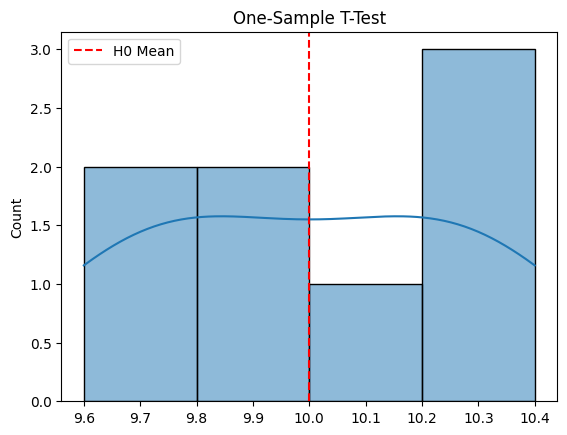

In [2]:
# Data
times = [9.8, 10.1, 9.7, 10.3, 9.9, 10.2, 9.6, 10.4]
stat, pval = stats.ttest_1samp(times, 10)

print("T-statistic:", stat, "p-value:", pval)

# Visualization
sns.histplot(times, kde=True)
plt.axvline(10, color="red", linestyle="--", label="H0 Mean")
plt.legend()
plt.title("One-Sample T-Test")
plt.show()

In [12]:
# 2️⃣ One-sample t-test (mean)

# Problem:
# A factory claims that light bulbs last 1000 hours on average. You randomly test 12 bulbs and record:
# [980, 995, 1020, 1005, 990, 1010, 985, 1000, 995, 1005, 1000, 1015]
# Test if the mean bulb life differs from 1000 hours.
H0 = "Mean life of a light bulb is 1000 hrs"
Ha = "Mean life of a light bulb is not 1000 hrs"
pop_mean = 1000
alpha = 0.05
bulbs_life = [970, 985, 1005, 1015, 995, 1000, 990, 1005, 980, 1010, 995, 1020]
t, p = stats.ttest_1samp(a=bulbs_life, popmean=pop_mean)
print(f"Stat = {t}\npvalue = {p}\n")

if p < alpha :
    print(f"There is enough evidence that the sample has data that is rare enough to reject the hypothesis H0 ie {H0}")
else:
    print(f"There isn't enough evidence that the sample has data that is rare enough to reject the hypothesis H0 ie {H0}")


Stat = -0.5893796917545019
pvalue = 0.5675141769123453

There isn't enough evidence that the sample has data that is rare enough to reject the hypothesis H0 ie Mean life of a light bulb is 1000 hrs


## 3️⃣ Two-Sample Independent T-Test

Compare group A vs B means.

T-statistic: -1.035703885509666 p-value: 0.3046393103662474


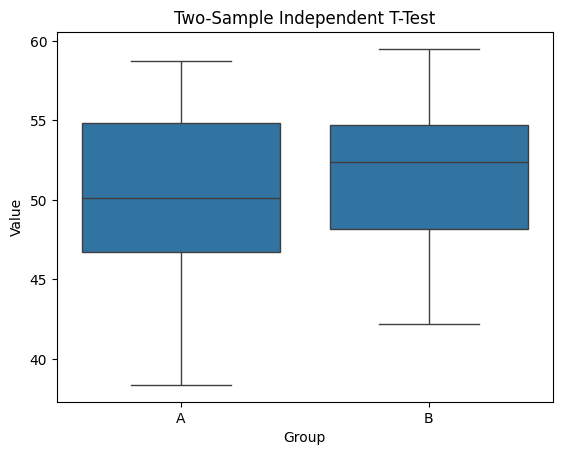

In [16]:
group_a = np.random.normal(50, 5, 30)
group_b = np.random.normal(52, 5, 30)

stat, pval = stats.ttest_ind(group_a, group_b)

print("T-statistic:", stat, "p-value:", pval)

# Visualization
df = pd.DataFrame({"Value": np.concatenate([group_a, group_b]),
                   "Group": ["A"]*30 + ["B"]*30})

sns.boxplot(data=df, x="Group", y="Value")
plt.title("Two-Sample Independent T-Test")
plt.show()

Stat = 1.212678125181665
pvalue = 0.25315665571911794

There isn't enough evidence that the sample has data that is rare enough to reject the hypothesis H0 ie The means of group A and group B are the same


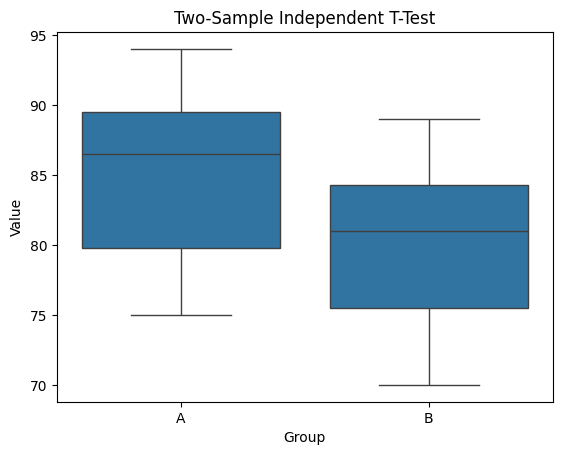

In [22]:
# 3️⃣ Two-sample independent t-test

# Problem:
# You want to compare scores of two groups of students:
# 	•	Group A: [85, 88, 90, 75, 78, 94]
# 	•	Group B: [80, 82, 85, 70, 74, 89]
# Test whether their means are significantly different.

H0 = "The means of group A and group B are the same"
Ha = "The means of group A and group B are not the same"
alpha = 0.05
A =  [85, 88, 90, 75, 78, 94]
B = [80, 82, 85, 70, 74, 89]
stat , pval = stats.ttest_ind(a=A, b=B, equal_var=False)
print(f"Stat = {stat}\npvalue = {pval}\n")

if pval < alpha :
    print(f"There is enough evidence that the sample has data that is rare enough to reject the hypothesis H0 ie {H0}")
else:
    print(f"There isn't enough evidence that the sample has data that is rare enough to reject the hypothesis H0 ie {H0}")

# Visualization
df = pd.DataFrame({"Value": np.concatenate([A, B]),
                   "Group": ["A"]*len(A) + ["B"]*len(B)})

sns.boxplot(data=df, x="Group", y="Value")
plt.title("Two-Sample Independent T-Test")
plt.show()


## 4️⃣ Paired T-Test

Before vs after treatment.

T-statistic: 3.1666666666666665 p-value: 0.03396614445768253


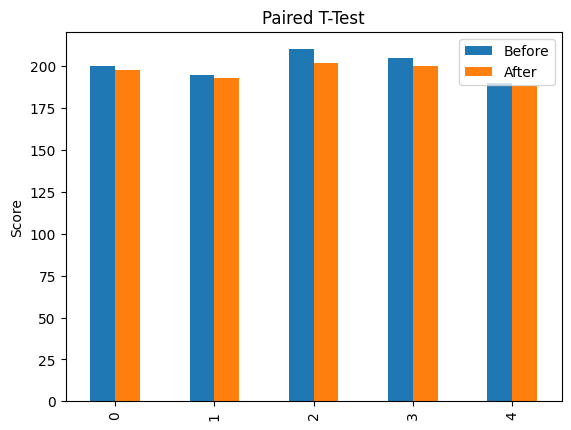

In [17]:
before = np.array([200, 195, 210, 205, 190])
after = np.array([198, 193, 202, 200, 188])

stat, pval = stats.ttest_rel(before, after)

print("T-statistic:", stat, "p-value:", pval)

# Visualization
df = pd.DataFrame({"Before": before, "After": after})
df.plot(kind="bar")
plt.title("Paired T-Test")
plt.ylabel("Score")
plt.show()

Stat = 8.730378697119729
pvalue = 0.0003265488187970372

There is enough evidence that the sample has data that is rare enough to reject the hypothesis H0 ie The means difference of BP before and after the treatment is 0


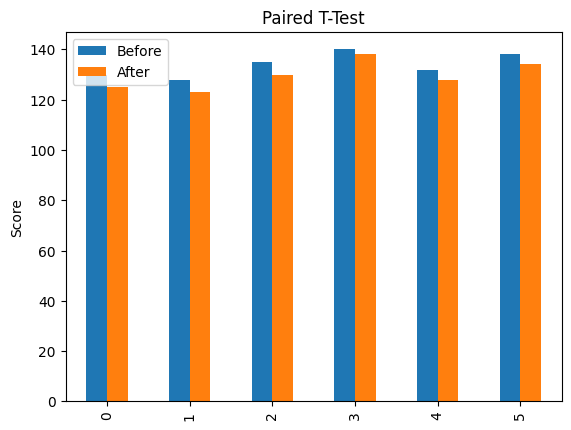

In [25]:
# 4️⃣ Paired t-test

# Problem:
# Measure blood pressure of 6 patients before and after a treatment:

# Before	After
# 130	125
# 128	123
# 135	130
# 140	138
# 132	128
# 138	134

before  = [130, 128, 135, 140, 132, 138]
after = [125, 123, 130, 138, 128, 134]
alpha =0.05
# Test if the treatment had a significant effect. Since it is a not equal to test we will use the default two-sided test
H0 = "The means difference of BP before and after the treatment is 0"
Ha = "The means difference of BP before and after the treatment is not 0"
stat, p = stats.ttest_rel(a=before, b=after)

print(f"Stat = {stat}\npvalue = {p}\n")

if p < alpha :
    print(f"There is enough evidence that the sample has data that is rare enough to reject the hypothesis H0 ie {H0}")
else:
    print(f"There isn't enough evidence that the sample has data that is rare enough to reject the hypothesis H0 ie {H0}")

# Visualization
df = pd.DataFrame({"Before": before, "After": after})
df.plot(kind="bar")
plt.title("Paired T-Test")
plt.ylabel("Score")
plt.show()

## 5️⃣ Two-Sample Proportion Z-Test

Compare conversion rates of A/B test.

Z-statistic: -0.8099368451891321 p-value: 0.4179764741282782


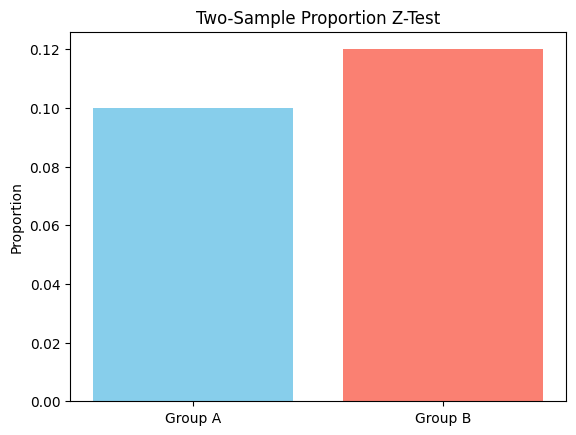

In [18]:
successes = np.array([30, 42])
samples = np.array([300, 350])

stat, pval = proportions_ztest(successes, samples)

print("Z-statistic:", stat, "p-value:", pval)

# Visualization
props = successes / samples
plt.bar(["Group A", "Group B"], props, color=["skyblue", "salmon"])
plt.title("Two-Sample Proportion Z-Test")
plt.ylabel("Proportion")
plt.show()

Stat = -0.8099368451891321
pvalue = 0.4179764741282782

There isn't enough evidence that the sample has data that is rare enough to reject the hypothesis H0 ie The conversion rates are not significantly different


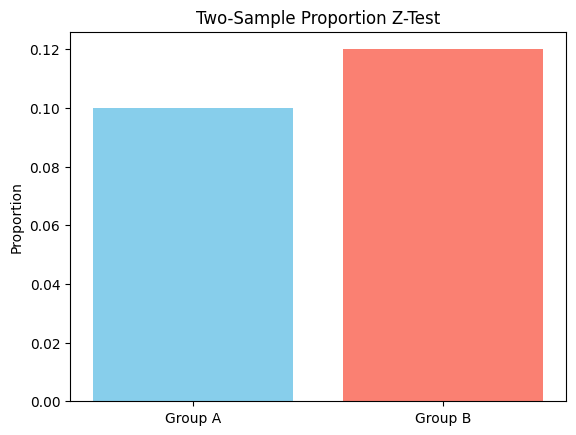

In [34]:
# 5️⃣ Two-sample proportion Z-test

# Problem:
# Two versions of a landing page are tested:
# 	•	Version A: 30 conversions / 300 visitors
# 	•	Version B: 42 conversions / 350 visitors

# Test at α = 0.05 if the conversion rates are different.
H0 = "The conversion rates are not significantly different"
Ha = "The conversion rates are significantly different"

n_a = 300
success_a = 30
n_b = 350
success_b = 42
alpha = 0.05
stat , p_val = proportions_ztest([success_a, success_b], [n_a, n_b])

print(f"Stat = {stat}\npvalue = {p_val}\n")

if p_val < alpha :
    print(f"There is enough evidence that the sample has data that is rare enough to reject the hypothesis H0 ie {H0}")
else:
    print(f"There isn't enough evidence that the sample has data that is rare enough to reject the hypothesis H0 ie {H0}")

# Visualization
successes = np.array([success_a, success_b])
samples = np.array([n_a, n_b])
props =   successes / samples 
plt.bar(["Group A", "Group B"], props, color=["skyblue", "salmon"])
plt.title("Two-Sample Proportion Z-Test")
plt.ylabel("Proportion")
plt.show()



# 6️⃣ Chi-Square Test for Independence

Gender vs Product Choice.

Chi2: 0.6464646464646464 p-value: 0.4213795037428696 df: 1


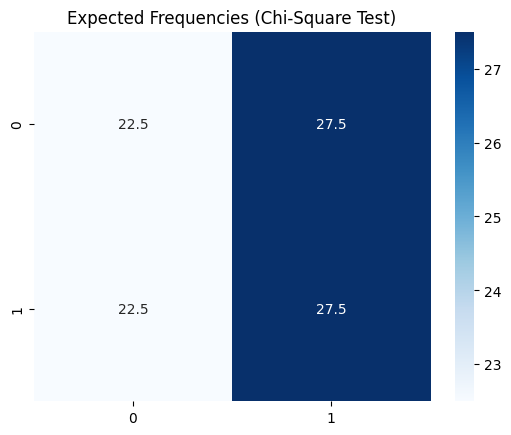

In [19]:
data = [[20, 30], [25, 25]]  # rows=Gender, cols=Product
chi2, pval, dof, expected = stats.chi2_contingency(data)

print("Chi2:", chi2, "p-value:", pval, "df:", dof)

# Visualization
sns.heatmap(expected, annot=True, fmt=".1f", cmap="Blues")
plt.title("Expected Frequencies (Chi-Square Test)")
plt.show()

In [39]:
# Problem:
# Survey 50 people on Gender and Product preference:

# 	Product A	Product B
# Male	10	15
# Female	8	17

# Test if gender and product preference are independent.

H0 = "Gender and product preferences are independent"
Ha = "Gender and product preferences are not independent"
alpha = 0.05
data = [[10,15],[8, 17]]

chi2, p_val, dof, expected = stats.chi2_contingency(data)

print(f"Stat = {chi2}\npvalue = {p_val}\n")
print(chi2)
print(dof)
print(expected)
if p_val < alpha :
    print(f"There is enough evidence that the sample has data that is rare enough to reject the hypothesis H0 ie {H0}")
else:
    print(f"There isn't enough evidence that the sample has data that is rare enough to reject the hypothesis H0 ie {H0}")



Stat = 0.08680555555555555
pvalue = 0.7682782035458339

0.08680555555555555
1
[[ 9. 16.]
 [ 9. 16.]]
There isn't enough evidence that the sample has data that is rare enough to reject the hypothesis H0 ie Gender and product preferences are independent


# 6️⃣ Chi-Square Test for Goodness of fit
Gender vs Product Choice.

Chi-square Statistic = 1.0000
p-value = 0.9626
Fail to reject H0: No evidence the die is unfair


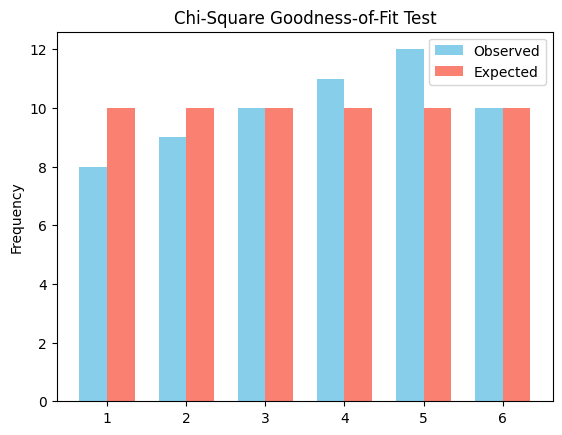

In [79]:
observed = np.array([8, 9, 10, 11, 12, 10])

# Expected frequencies (fair die: uniform)
expected = np.array([10, 10, 10, 10, 10, 10])
categories = ["1","2","3","4","5","6"]
# Chi-square test
chi2_stat, p_val = stats.chisquare(f_obs=observed, f_exp=expected)

print(f"Chi-square Statistic = {chi2_stat:.4f}")
print(f"p-value = {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    print("Reject H0: The die is not fair")
else:
    print("Fail to reject H0: No evidence the die is unfair")
x = np.arange(len(categories))
width = 0.35
plt.bar(x - width/2, observed, width, label='Observed', color='skyblue')
plt.bar(x + width/2, expected, width, label='Expected', color='salmon')
plt.xticks(x, categories)
plt.ylabel("Frequency")
plt.title("Chi-Square Goodness-of-Fit Test")
plt.legend()
plt.show()

Chi-square Statistic = 1.0000
p-value = 0.0002
Reject H0 ie: The mobile app downloads across all the categories are distributed equally, The mobile app downloads across all the categories are not distributed equally might be correct


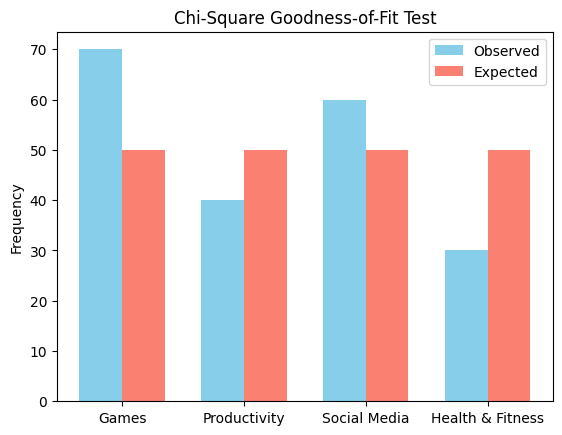

In [50]:
# Problem: 📱 App Downloads

# A mobile app store claims that downloads across 4 categories are equally distributed:
# 	•	Games
# 	•	Productivity
# 	•	Social Media
# 	•	Health & Fitness

# You take a random sample of 200 downloads and observe:
# 	•	Games → 70
# 	•	Productivity → 40
# 	•	Social Media → 60
# 	•	Health & Fitness → 30

# At significance level α = 0.05, test whether downloads follow a uniform distribution (equal across categories).

# ⸻

# 	•	H₀ (Null Hypothesis): Downloads are uniformly distributed across categories.
# 	•	Hₐ (Alternative Hypothesis): Downloads are not uniformly distributed.


H0 = "The mobile app downloads across all the categories are distributed equally"
Ha = "The mobile app downloads across all the categories are not distributed equally"
categories = ["Games", "Productivity", "Social Media" ,"Health & Fitness"]
observed = np.array([70, 40, 60, 30])
expected = [observed.sum()/len(categories)] * 4
expected = np.array(expected)
alpha = 0.05

stat, p_val = stats.chisquare(f_obs=observed, f_exp=expected)
print(f"Chi-square Statistic = {chi2_stat:.4f}")
print(f"p-value = {p_val:.4f}")


if p_val < alpha:
    print(f"Reject H0 ie: {H0}, {Ha} might be correct")
else:
    print(f"Fail to reject H0 ie: {H0}")
x = np.arange(len(categories))
width = 0.35
plt.bar(x - width/2, observed, width, label='Observed', color='skyblue')
plt.bar(x + width/2, expected, width, label='Expected', color='salmon')
plt.xticks(x, categories)
plt.ylabel("Frequency")
plt.title("Chi-Square Goodness-of-Fit Test")
plt.legend()
plt.show()


# 7️⃣ McNemar’s Test

Before vs After program.

Chi2: 0.16666666666666666 p-value: 0.6830913983096086


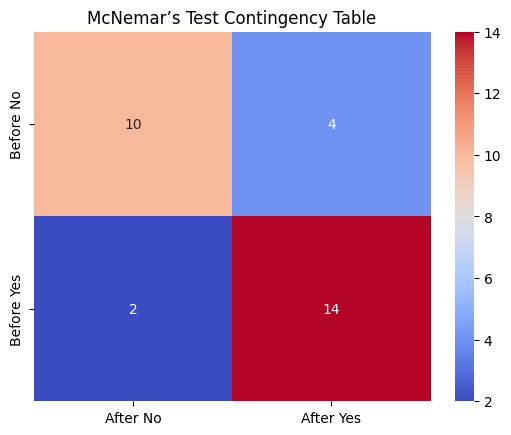

In [20]:
table = [[10, 4],
         [2, 14]]  # b=4, c=2

result = mcnemar(table, exact=False, correction=True)

print("Chi2:", result.statistic, "p-value:", result.pvalue)

# Visualization
df = pd.DataFrame(table, columns=["After No", "After Yes"], index=["Before No", "Before Yes"])
sns.heatmap(df, annot=True, cmap="coolwarm", fmt="d")
plt.title("McNemar’s Test Contingency Table")
plt.show()

Mcnemar test stat: 0.125
Pvalue: 0.7236736098317629
We fail to reject H0 ie: The program did not have significant effect so the change of state of success and failure are equally distribured as before


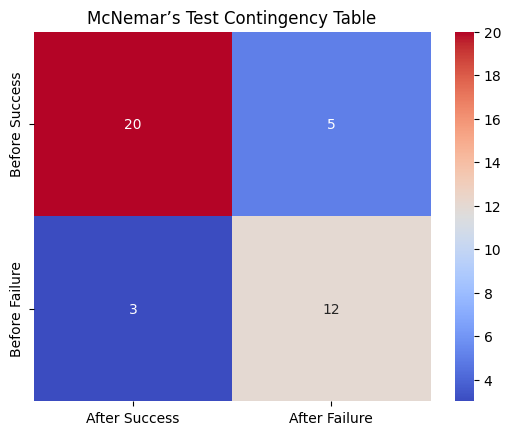

In [60]:
# 7️⃣ McNemar’s test

# Problem:
# A training program measures success before and after:

# 	After Success	After Failure
# Before Success	20	5
# Before Failure	3	12

# Test if the program had a significant effect.

H0 = "The program did not have significant effect so the change of state of success and failure are equally distribured as before"
Ha = "The program did  have significant effect so the change of state of success and failure are not equally distribured as before"
table = [[20,5],
         [3,12]]
alpha = 0.05
result = mcnemar(table, exact=False, correction=True)
stat = result.statistic
p_val = result.pvalue
print(f"Mcnemar test stat: {stat}")
print(f"Pvalue: {p_val}")

if p_val < alpha:
    print(f"Reject H0 ie : {H0} and {Ha} might be correct")
else:
    print(f"We fail to reject H0 ie: {H0}") 

df = pd.DataFrame(table, columns=["After Success", "After Failure"], index=[ "Before Success", "Before Failure"])
sns.heatmap(df, annot=True, cmap="coolwarm", fmt="d")
plt.title("McNemar’s Test Contingency Table")
plt.show()



## 8️⃣ One-Way ANOVA

Math vs CS vs History scores.

F-statistic: 20.333333333333314 p-value: 0.0004589852517263547


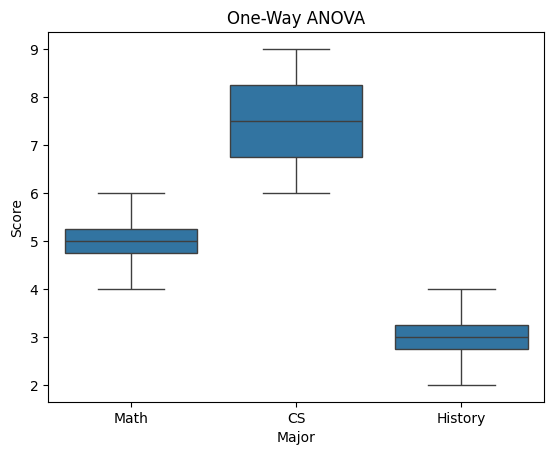

In [21]:
math = [5, 6, 4, 5]
cs = [8, 7, 9, 6]
history = [3, 4, 2, 3]

stat, pval = stats.f_oneway(math, cs, history)

print("F-statistic:", stat, "p-value:", pval)

# Visualization
df = pd.DataFrame({"Score": math+cs+history,
                   "Major": ["Math"]*4 + ["CS"]*4 + ["History"]*4})

sns.boxplot(data=df, x="Major", y="Score")
plt.title("One-Way ANOVA")
plt.show()

Reject H0 ie : The mean test scores are not that different across subjects and The mean test scores are significantly different across subjects might be correct


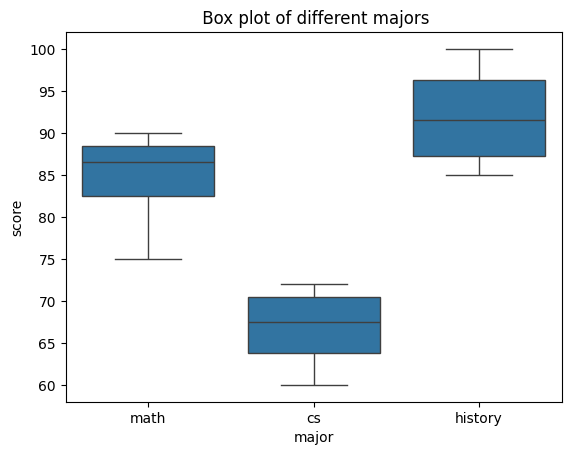

In [74]:
# 8️⃣ One-way ANOVA

# Problem:
# Compare test scores among three majors:
# 	•	Math: [85, 90, 88, 75]
# 	•	CS: [70, 65, 60, 72]
# 	•	History: [88, 95, 100, 85]

# Test at α = 0.05 if the means are different.

alpha = 0.05
H0 = "The mean test scores are not that different across subjects"
Ha = "The mean test scores are significantly different across subjects"

math = [85, 90, 88, 75]
cs = [70, 65, 60, 72]
history = [88, 95, 100, 85]

statistic, pvalue = stats.f_oneway(math, cs, history)

if pvalue < alpha:
    print(f"Reject H0 ie : {H0} and {Ha} might be correct")
else:
    print(f"We fail to reject H0 ie: {H0}") 

df = pd.DataFrame({"score": math + cs + history , "major":['math']*len(math) + ['cs']*len(cs) + ['history']*len(history)})
sns.boxplot(data=df, x='major', y='score')
plt.title(" Box plot of different majors")
plt.show()

# 9️⃣ Two-Way ANOVA

Effect of teaching method & gender.

                     sum_sq   df         F    PR(>F)
C(Method)             1.125  1.0  0.062937  0.814273
C(Gender)            91.125  1.0  5.097902  0.086887
C(Method):C(Gender)   1.125  1.0  0.062937  0.814273
Residual             71.500  4.0       NaN       NaN


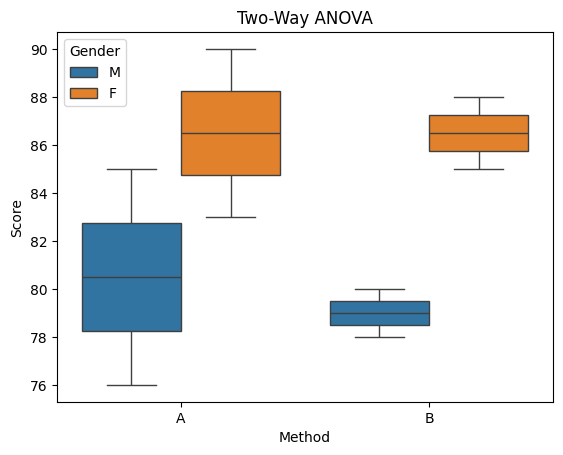

In [80]:
df = pd.DataFrame({
    "Score": [85, 90, 78, 88, 76, 83, 80, 85],
    "Method": ["A","A","B","B","A","A","B","B"],
    "Gender": ["M","F","M","F","M","F","M","F"]
})

model = ols("Score ~ C(Method) + C(Gender) + C(Method):C(Gender)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

# Visualization
sns.boxplot(data=df, x="Method", y="Score", hue="Gender")
plt.title("Two-Way ANOVA")
plt.show()

                     sum_sq   df          F    PR(>F)
C(Method)             112.5  1.0  34.615385  0.004171
C(Gender)              40.5  1.0  12.461538  0.024229
C(Method):C(Gender)     0.0  1.0   0.000000  1.000000
Residual               13.0  4.0        NaN       NaN


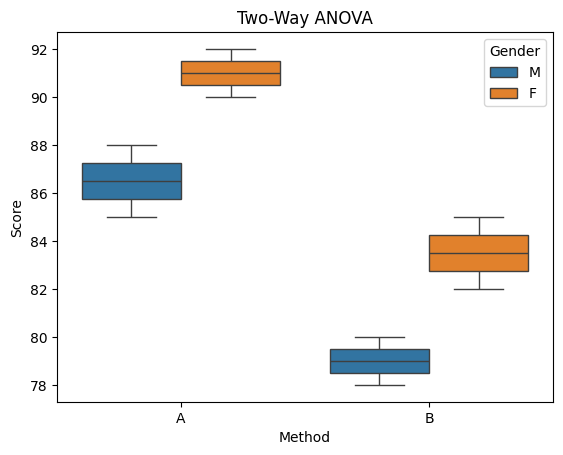

In [ ]:
# 9️⃣ Two-way ANOVA

# Problem:
# Effect of teaching method (A, B) and gender (M, F) on test scores:

# Method	Gender	Score
# A	M	85
# A	F	90
# A	M	88
# A	F	92
# B	M	78
# B	F	85
# B	M	80
# B	F	82

# Test for main effects and interaction.

# ⸻
df = pd.DataFrame({"Method": ['A','A','A','A','B','B','B','B'],
                   "Gender": ['M','F','M','F','M','F','M','F'],
                   "Score":[85, 90, 88, 92, 78, 85, 80, 82]})
model = ols("Score ~ C(Method) + C(Gender) + C(Method):C(Gender)", data=df).fit()
annova_table = sm.stats.anova_lm( model, typ = 2 )
print(annova_table)
# Visualization
sns.boxplot(data=df, x="Method", y="Score", hue="Gender")
plt.title("Two-Way ANOVA")
plt.show()

# Non Parametric tests
Non-parametric tests are useful when data don’t meet normality assumptions — for example, when the metric is ordinal, skewed, or based on medians rather than means. Instead of comparing averages, these tests compare ranks or distributions.

##### When to Use Non-Parametric Tests

Non-parametric tests are used when parametric test assumptions are violated, especially:

1. Non-Normal Distribution
	•	The data are skewed, heavy-tailed, or ordinal (e.g., satisfaction scores 1–5).
	•	Example: If income data are skewed right, a t-test is unreliable → use Mann-Whitney U instead.

2. Median or Rank-Based Comparisons
	•	When your metric is not a mean or proportion, but a median, rank, or ordinal score.
	•	Example: Comparing median time-to-purchase between treatment and control.

3. Small Sample Sizes
	•	With small n, normality assumptions can’t be trusted → non-parametric tests are safer.

4. Presence of Outliers
	•	Outliers can heavily bias means → rank-based methods (like Mann-Whitney) reduce their impact.



## Mann-Whitney test (Non parametric alternative to two sample independent T-test)

In [3]:
from scipy.stats import mannwhitneyu
H0 = "Two group A and B come from the same distribution"
Ha = "One group tends to have larger number ie their population distributions differ"

alpha = 0.05
group_A = [5, 7, 8, 6, 5]
group_B = [9, 10, 8, 7, 9]

stat, p = mannwhitneyu(group_A, group_B, alternative='two-sided')
print("U-statistic:", stat, "p-value:", p)

if p < alpha:
    print(f"There is sufficient evidence to reject H0 : {H0}")
else:
    print(f"There isn't sufficient evidence to reject H0 : {H0}")

U-statistic: 2.0 p-value: 0.034453637039471276
There is sufficient evidence to reject H0 : Two group A and B come from the same distribution


## Wilcoxon Signed Rank Test (Non parametric alternative to paired T-test)
-	It doesn’t require normal distribution, unlike the paired t-test.
-	The test actually looks at the ranks of differences between pairs, not just the medians.
-	That said, because it’s based on differences and ranks, the median difference is often the summary measure people report, but the test itself is technically about whether the distribution of differences is symmetric around zero.

In [6]:
from scipy.stats import wilcoxon

H0 = "The median difference between paired observations is 0."
Ha = "The median difference is not 0."

before = [5, 7, 8, 6, 9]
after  = [6, 8, 7, 7, 10]

stat, p = wilcoxon(before, after)
print(f"Test statistic: {stat}, p-value: {p}")

if p < alpha:
    print(f"There is sufficient evidence to reject H0 : {H0}")
else:
    print(f"There isn't sufficient evidence to reject H0 : {H0}")

Test statistic: 3.0, p-value: 0.375
There isn't sufficient evidence to reject H0 : The median difference between paired observations is 0.


In [ ]:
b

In [ ]:
from scipy.stats import kruskal, mannwhitneyu
import scikit_posthocs as sp

H_0 =  "The median engagement for Algorithm A = B = C"
H_a =  "At least one median differs among A, B, C"


# --------------------------
# Step 1: Simulate engagement data
# --------------------------
np.random.seed(42)
n_users = 50

engagement_A = np.random.normal(loc=10, scale=2, size=n_users)
engagement_B = np.random.normal(loc=12, scale=2, size=n_users)
engagement_C = np.random.normal(loc=11, scale=2, size=n_users)

df = pd.DataFrame({
    "engagement": np.concatenate([engagement_A, engagement_B, engagement_C]),
    "algorithm": ["A"]*n_users + ["B"]*n_users + ["C"]*n_users
})

# --------------------------
# Step 2: Kruskal-Wallis test
# --------------------------
stat, p = kruskal(engagement_A, engagement_B, engagement_C)
print(f"Kruskal-Wallis H = {stat}, p-value = {p}")

# --------------------------
# Step 3: Effect size (eta-squared)
# --------------------------
k = 3  # number of groups
n = len(df)
eta_sq = (stat - k + 1) / (n - k)
print(f"Effect size (eta-squared) = {eta_sq:.4f}")

# --------------------------
# Step 4: Median differences
# --------------------------
medians = df.groupby("algorithm")["engagement"].median()
print("Medians per group:")
print(medians)

alpha = 0.05

if p < alpha:
    print(f"There is sufficient evidence to reject H0 : {H0}")
else:
    print(f"There isn't sufficient evidence to reject H0 : {H0}")

Kruskal-Wallis H = 36.064868874172134, p-value = 1.474392892661348e-08
Effect size (eta-squared) = 0.2317
Medians per group:
algorithm
A     9.531710
B    12.092161
C    11.033716
Name: engagement, dtype: float64

Pairwise Mann-Whitney U test p-values:
A vs B: U = 400.00, p = 0.0000
A vs C: U = 790.00, p = 0.0015
B vs C: U = 1699.00, p = 0.0020
There is sufficient evidence to reject H0 : The median difference between paired observations is 0.
